In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


## 1. EDA 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.shape

(1000, 17)

In [7]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


In [12]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

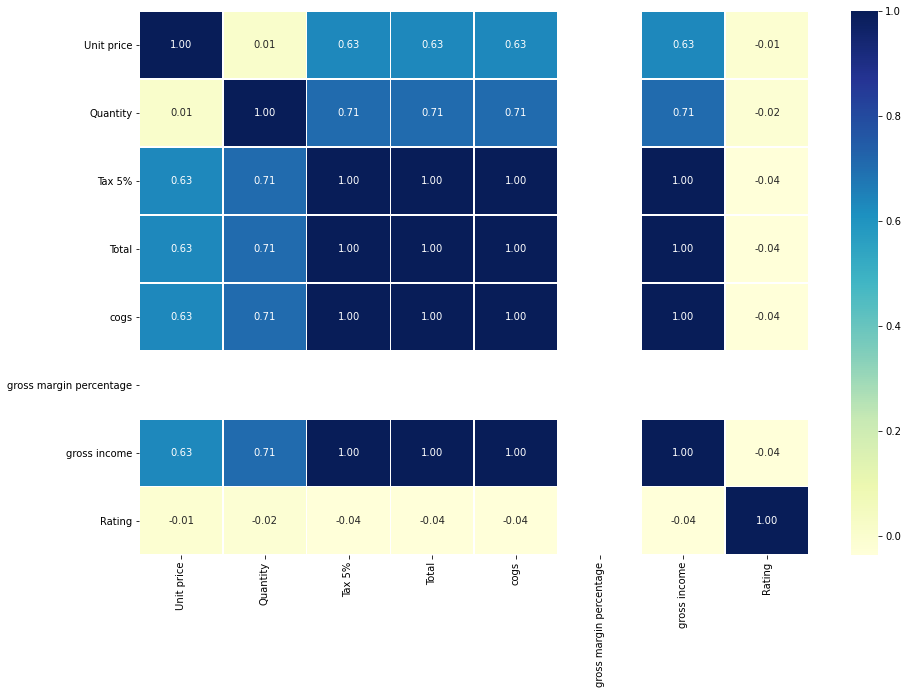

In [14]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu')

## feature engerning 

In [185]:
df_tmp = df.copy()
df_tmp = df_tmp.drop(['Invoice ID', 'Tax 5%', 'gross margin percentage', 'Time', 'Branch', 'cogs'], axis=1)

In [186]:
df_tmp['Date'] = pd.to_datetime(df_tmp['Date'])

In [187]:
df_tmp['Date'] = pd.to_datetime(df_tmp['Date'], format='%m/%d/%Y')

In [188]:
#df_tmp['Date'] = df_tmp['Date'].dt.date

In [189]:
df_tmp['year'] = df_tmp.Date.dt.year
df_tmp['month'] = df_tmp.Date.dt.month
df_tmp['day'] = df_tmp.Date.dt.day
df_tmp['dayOfWeek'] = df_tmp.Date.dt.dayofweek
df_tmp['dayOfYear'] = df_tmp.Date.dt.dayofyear
df_tmp['weekday'] = df_tmp['Date'].dt.day_name().str.slice(0, 3)

In [190]:
df_tmp = df_tmp.drop('Date', axis=1)

In [191]:
df_tmp.columns

Index(['City', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Total', 'Payment', 'gross income', 'Rating', 'year',
       'month', 'day', 'dayOfWeek', 'dayOfYear', 'weekday'],
      dtype='object')

## data distribution and city-wise Comparison

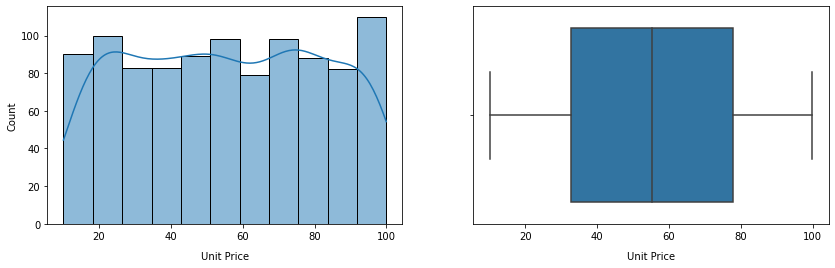

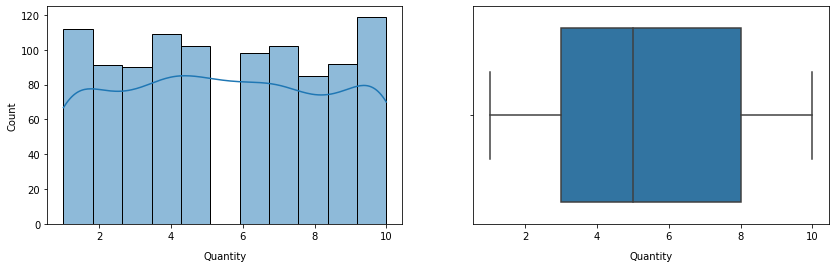

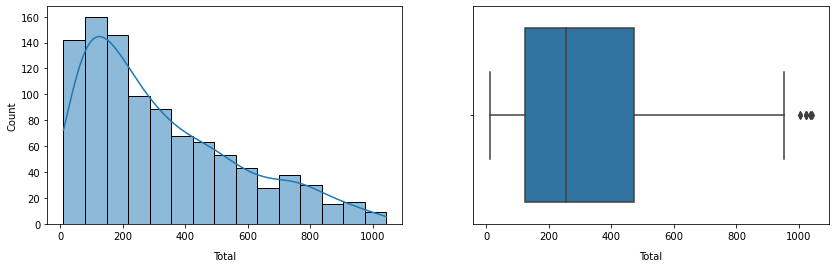

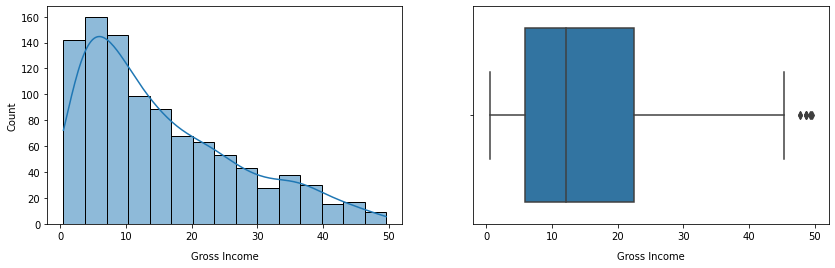

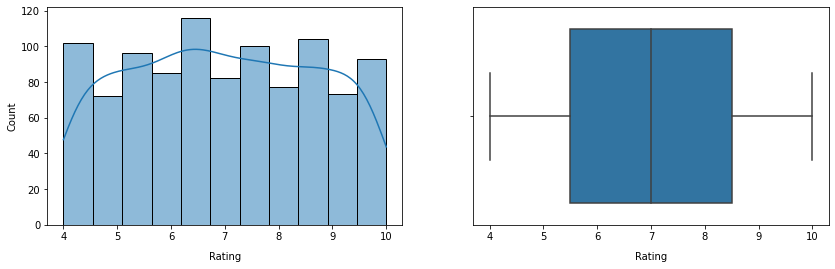

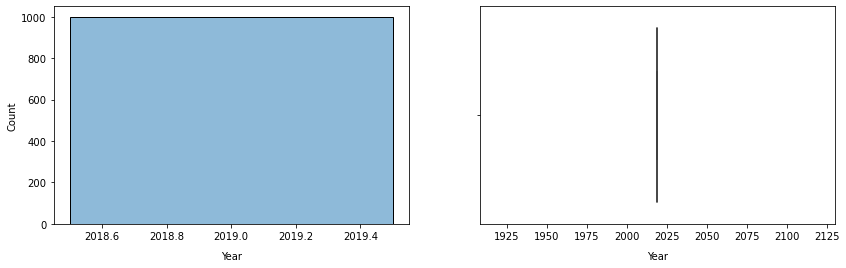

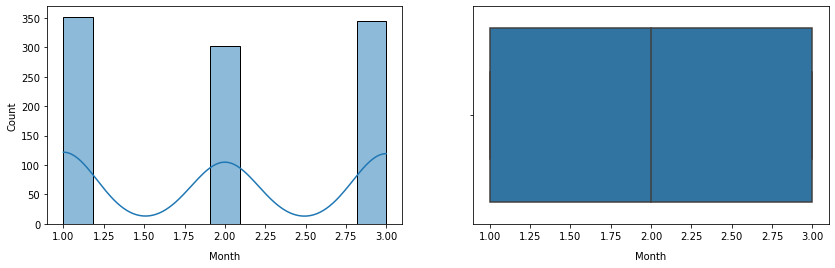

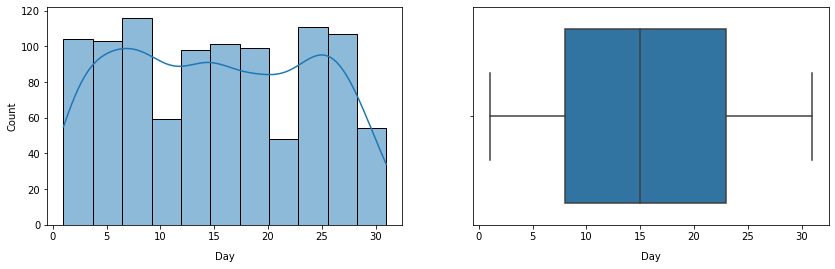

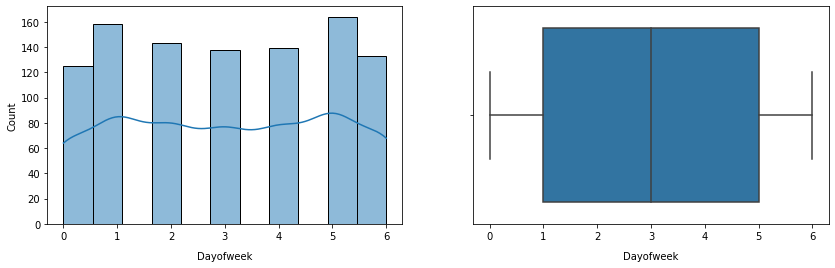

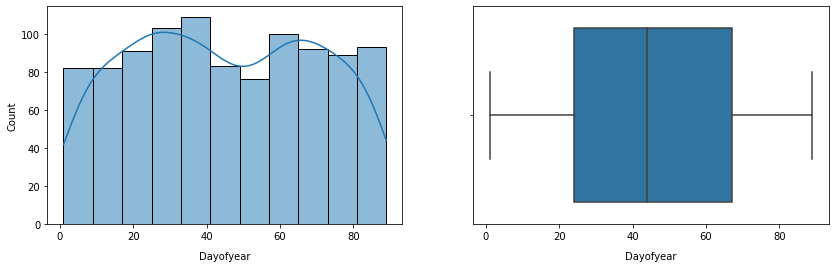

In [192]:
numericals = df_tmp.select_dtypes(include='number').columns

for col in numericals:
    fig, axes = plt.subplots(1,2, figsize=(14,4))
    
    ax1= sns.histplot(
    x=col,
    data=df_tmp,
    kde=True,
    ax=axes[0],
    )
    
    ax2 = sns.boxplot(
    x=col,
    data=df_tmp,
    hue='City',
    ax=axes[1],
    )
    
    ax1.set_xlabel(col.replace('_',' ').title(), labelpad=10)
    ax2.set_xlabel(col.replace('_',' ').title(), labelpad=10)
    
    plt.show()

In [193]:
cat = df_tmp.select_dtypes('object').columns

In [194]:
cat

Index(['City', 'Customer type', 'Gender', 'Product line', 'Payment',
       'weekday'],
      dtype='object')

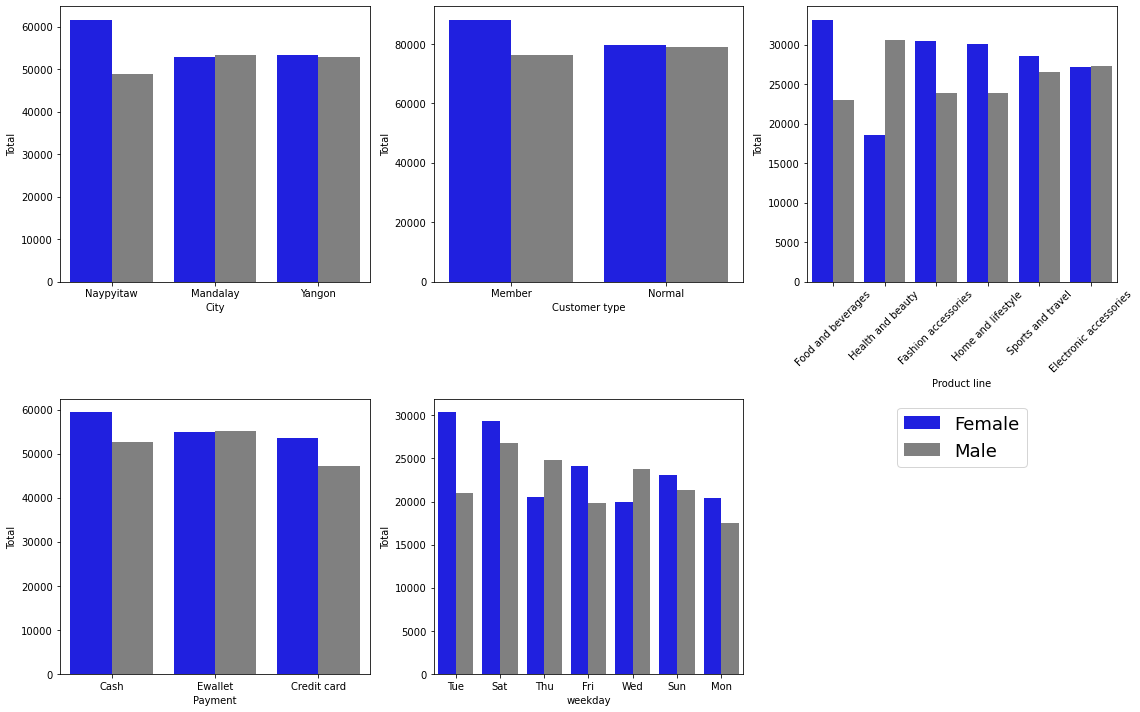

In [195]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, column in enumerate(cat.drop('Gender')):
    category_totals = df_tmp.groupby([column, 'Gender'])['Total'].sum().sort_values(ascending=False).reset_index()
    
    sns.barplot(
        data=category_totals,
        x=column,
        y='Total',
        ax=axes[i],
        palette=['blue', 'gray'],
        hue='Gender',
    )

    axes[i].legend_.remove()

    if i == 2:
        axes[i].tick_params(axis='x', rotation=45)

axes[-1].axis('off')
handles, labels = axes[0].get_legend_handles_labels()
axes[-1].legend(handles, labels, loc='upper center', fontsize=18) 

plt.tight_layout()
plt.show()

In [196]:
df_tmp.columns

Index(['City', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Total', 'Payment', 'gross income', 'Rating', 'year',
       'month', 'day', 'dayOfWeek', 'dayOfYear', 'weekday'],
      dtype='object')

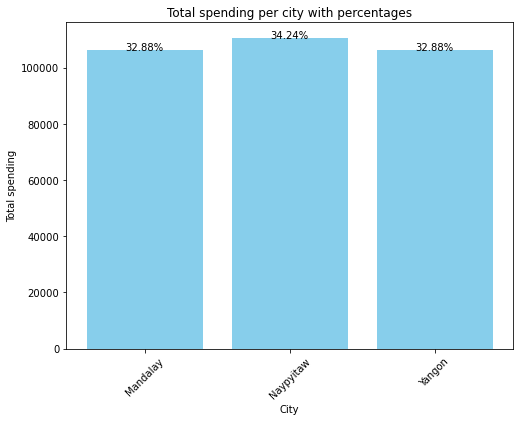

In [197]:
city_total = df_tmp.groupby('City')['Total'].sum().reset_index()

city_total['percentage'] = (city_total['Total']/city_total['Total'].sum()) * 100

plt.figure(figsize=(8,6))
plt.bar(city_total['City'], city_total['Total'], color='skyblue')

for i, val in enumerate(city_total['percentage']):
    plt.text(i, city_total['Total'][i]+0.01, f'{val:.2f}%', ha='center')
    
plt.title('Total spending per city with percentages')
plt.xlabel('City')
plt.ylabel('Total spending')
plt.xticks(rotation=45)
plt.show()

In [198]:
total_each_city= df_tmp.groupby('City')['Total'].sum().sort_values(ascending=False)
total_each_city

City
Naypyitaw    110568.7065
Yangon       106200.3705
Mandalay     106197.6720
Name: Total, dtype: float64

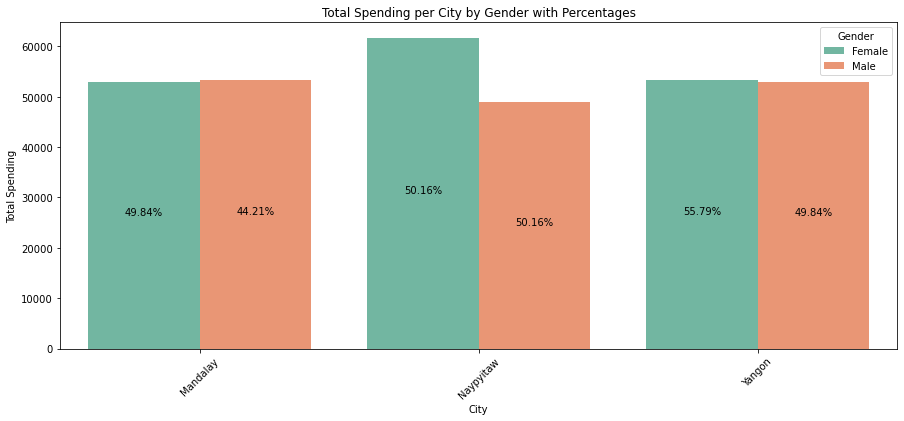

In [199]:
city_gender_total = df_tmp.groupby(['City', 'Gender'])['Total'].sum().reset_index()

total_by_city = city_gender_total.groupby('City')['Total'].transform('sum')
city_gender_total['Percentage'] = (city_gender_total['Total'] / total_by_city) * 100

plt.figure(figsize=(15,6))
bars = sns.barplot(x='City', y='Total', hue='Gender', data=city_gender_total, palette='Set2')
for bar, row in zip(bars.patches, city_gender_total.itertuples()):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height * 0.5, f"{row.Percentage:.2f}%", ha='center', color='black')

plt.title('Total Spending per City by Gender with Percentages')
plt.xlabel('City')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()


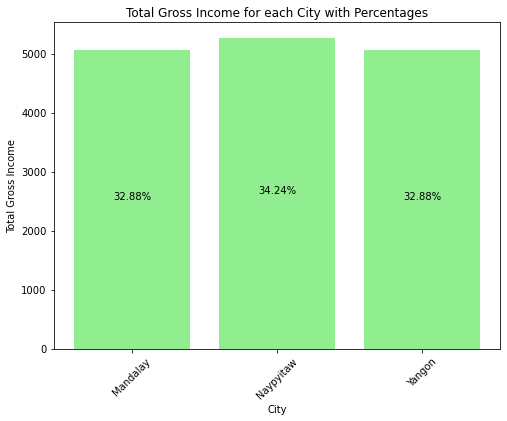

In [200]:
city_gross_income = df_tmp.groupby('City')['gross income'].sum().reset_index()
city_gross_income['Percentage'] = (city_gross_income['gross income'] / city_gross_income['gross income'].sum()) * 100


plt.figure(figsize=(8,6))
bars = plt.bar(city_gross_income['City'], city_gross_income['gross income'], color='lightgreen')


for bar, val in zip(bars, city_gross_income['Percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height * 0.5, f'{val:.2f}%', ha='center', color='black')

plt.title('Total Gross Income for each City with Percentages')
plt.xlabel('City')
plt.ylabel('Total Gross Income')
plt.xticks(rotation=45)
plt.show()

In [201]:
total_income_city= df_tmp.groupby('City')['gross income'].sum().sort_values(ascending=False)
total_income_city

City
Naypyitaw    5265.1765
Yangon       5057.1605
Mandalay     5057.0320
Name: gross income, dtype: float64

In [202]:
total_income_city= df_tmp.groupby('month')['gross income'].sum().sort_values(ascending=False)
total_income_city

month
1    5537.708
3    5212.167
2    4629.494
Name: gross income, dtype: float64

In [203]:
total_income_city= df_tmp.groupby('weekday')['gross income'].sum().sort_values(ascending=False)
total_income_city

weekday
Sat    2672.4195
Tue    2451.5355
Thu    2159.4880
Sun    2117.0425
Fri    2091.7305
Wed    2082.4350
Mon    1804.7180
Name: gross income, dtype: float64

In [204]:
city_product_count = df.groupby(['City', 'Product line']).size().reset_index(name='count')
city_product_count['Total'] = city_product_count.sum(axis=1)
city_product_pivot_sorted = city_product_count.sort_values('Total', ascending=False).drop(columns='Total')
city_product_pivot_sorted

,City,Product line,count
8,Naypyitaw,Food and beverages,66
16,Yangon,Home and lifestyle,65
7,Naypyitaw,Fashion accessories,65
5,Mandalay,Sports and travel,62
1,Mandalay,Fashion accessories,62
12,Yangon,Electronic accessories,60
17,Yangon,Sports and travel,59
14,Yangon,Food and beverages,58
0,Mandalay,Electronic accessories,55
6,Naypyitaw,Electronic accessories,55


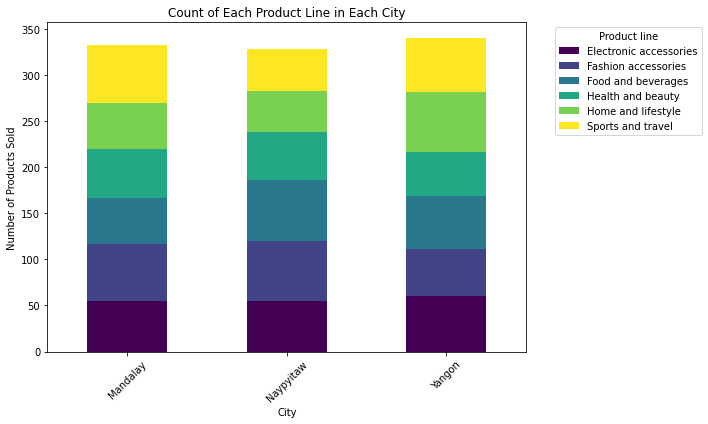

In [209]:
city_product_pivot_sorted = city_product_count.pivot(index='City', columns='Product line', values='count').fillna(0)

city_product_pivot_sorted.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Count of Each Product Line in Each City')
plt.xlabel('City')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45) 
plt.legend(title='Product line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [211]:
cus_type = df_tmp.groupby('Customer type')['Total'].sum().sort_values(ascending=False)
cus_type

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

In [216]:
customer_type_counts = df_tmp['Customer type'].value_counts()
customer_type_counts

Member    501
Normal    499
Name: Customer type, dtype: int64

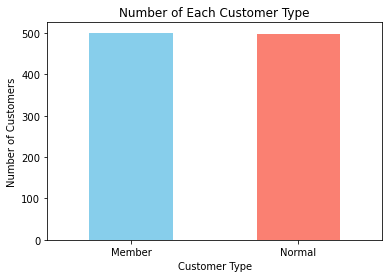

In [218]:
customer_type_counts.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Number of Each Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0) 
plt.show()

In [223]:
total_rating_per_product_line = df.groupby('Product line')['Rating'].sum().reset_index()
total_rating_per_product_line

,Product line,Rating
0,Electronic accessories,1177.2
1,Fashion accessories,1251.2
2,Food and beverages,1237.7
3,Health and beauty,1064.5
4,Home and lifestyle,1094.0
5,Sports and travel,1148.1
